In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.decomposition import PCA

from sklearn.feature_selection import VarianceThreshold, SelectFromModel, RFECV, SequentialFeatureSelector

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import accuracy_score

from sklearn.datasets import make_classification, load_wine, load_breast_cancer, load_diabetes, load_digits

In [2]:
plt.style.use('seaborn-darkgrid')

In [3]:
def plot_scatter(x, y, auto_scaled=True, title=None, clusters=None):
    plt.figure(figsize=(4, 4))
    plt.scatter(x, y, c=clusters, cmap='bwr')
    
    if not auto_scaled:
        plt.axis('square')
    
    plt.grid(True)
    plt.title(title)
    
    plt.show()
    
def return_X_y(data, target_column):
    return data.drop(target_column, axis=1), data[target_column]

In [4]:
wine_sklearn = load_wine(as_frame=True)
wine_data, wine_labels = wine_sklearn['data'], wine_sklearn['target']

# Homework

## Exercise  1 - Scaling (2 points)

Perform standardization for wine dataset (`wine_data`) using only basic python, numpy and pandas (without using `StandardScaler` and sklearn at all). Implementation of function (or class) that can get dataset as input and return standardized dataset as output is preferrable, but not necessary.

Compare you results (output) with `StandardScaler`.

**NOTE:**

- 1 point for functional version, 2 points for implementing scaling as sklearn pipeline compartible class. 
- Maximum for the exercise is 2 points.


### Simple version (1 point)

Давайте посмотрим на данные- wine_data:

In [5]:
wine_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [6]:
X = wine_data.values

Напишем собственную функцию стандартизации standard_scaler(X) в общем виде.

In [7]:
# 1 point
def scale(X):
    return (X-np.mean(X, axis=0)) / np.std(X, axis=0)

In [8]:
assert np.allclose(np.array(scale(wine_data)), StandardScaler().fit_transform(wine_data))

Выведем на экран массив отскалированных даных при помощи собственной функции - standard_scaler(X).

In [9]:
X_scaled = scale(X)
X_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

Для визульной проверки, посмотрим на произвольный столбец отскалированных данных, построив гистрограмму.

(array([ 8., 16., 33., 38., 14., 25., 16., 13.,  7.,  8.]),
 array([-1.86823402, -1.4411703 , -1.01410658, -0.58704286, -0.15997914,
         0.26708458,  0.6941483 ,  1.12121203,  1.54827575,  1.97533947,
         2.40240319]),
 <BarContainer object of 10 artists>)

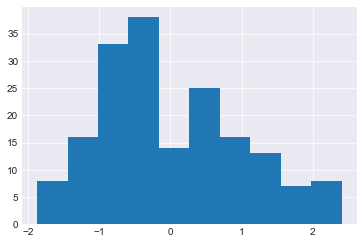

In [10]:
plt.hist(X_scaled[:,7])

Отскалируем данные при помощи StandardScaler, построим гистограмму по тому-же столбцу:

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled_1 = scaler.transform(X)

(array([ 8., 16., 33., 38., 14., 25., 16., 13.,  7.,  8.]),
 array([-1.86823402, -1.4411703 , -1.01410658, -0.58704286, -0.15997914,
         0.26708458,  0.6941483 ,  1.12121203,  1.54827575,  1.97533947,
         2.40240319]),
 <BarContainer object of 10 artists>)

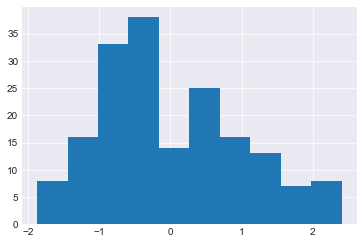

In [12]:
plt.hist(X_scaled_1[:,7])

собственная и библиотечная функции работают идентично.

### Pipeline Version (2 points)

In [13]:
# 2 points
from sklearn.base import BaseEstimator, TransformerMixin
class CustomScaler(BaseEstimator, TransformerMixin): 
    def __init__(self):
        return None
    
    def fit(self, X, y = None):
        print(type(X)) # the type of X might be a DataFrame or a NumPy array
        self.means = np.mean(X, axis=0)    # calculate the mean
        self.stds = np.std(X, axis=0)      # calculate the standard deviation
        return self
    
    def transform(self, X, y = None):
        return (X - self.means) / self.stds

In [14]:
assert np.allclose(CustomScaler().fit_transform(wine_data), StandardScaler().fit_transform(wine_data))

<class 'pandas.core.frame.DataFrame'>


## Exercise  2 - Visualization (3 points)

As noted earlier, standardization/normalization of data can be crucial for some distance-based ML methods.

Let’s generate some toy example of unnormalized data and visualize the importance of this process once more:

In [15]:
feature_0 = np.random.randn(1000) * 10   
feature_1 = np.concatenate([np.random.randn(500), np.random.randn(500) + 5])
data = np.column_stack([feature_0, feature_1])
data 

array([[  0.91027849,   1.20779149],
       [  6.13357542,   1.78118679],
       [-19.39016141,   0.18742975],
       ...,
       [ 12.63801925,   4.02616494],
       [ -4.61117476,   4.87304072],
       [ -7.25171547,   4.1069353 ]])

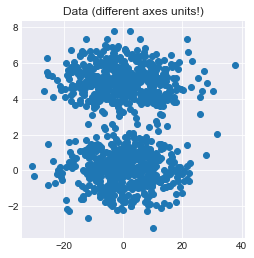

In [16]:
plot_scatter(data[:, 0], data[:, 1], auto_scaled=True, title='Data (different axes units!)')

**NOTE:** on the plot above axes are scaled differently and we can clearly see two potential *classes/clusters*. In fact `matplotlib` performed `autoscaling` (which is basically can be considered as `MinMaxScaling` of original data) just for better visualization purposes.

Let's turn this feature off and visualize the original data on the plot with equally scaled axes:

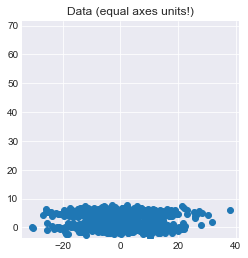

In [17]:
plot_scatter(data[:, 0], data[:, 1], auto_scaled=False , title='Data (equal axes units!)')

This picture is clearly less interpretable, but much closer to "how distance-based algorithm see the original data": separability of data is hardly noticable only because the variation (std) of x-feature is much bigger in absolute numbers.

Perform `StandardScaling` and `MinMaxScaling` of original data; visualize results for each case (**use `plot_scatter` with `auto_scaled=False`**):

### MinMaxScaling (0.5 point)

In [18]:
feature_0 = np.random.randn(1000) * 10   
feature_1 = np.concatenate([np.random.randn(500), np.random.randn(500) + 5])
data = np.column_stack([feature_0, feature_1])

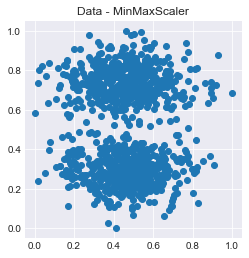

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data)
Scaled_data = scaler.transform(data)

plot_scatter(Scaled_data[:, 0], Scaled_data[:, 1], auto_scaled=False, title='Data - MinMaxScaler')

### StandardScaler (0.5 point)

In [20]:
feature_0 = np.random.randn(1000) * 10   
feature_1 = np.concatenate([np.random.randn(500), np.random.randn(500) + 5])
data = np.column_stack([feature_0, feature_1])

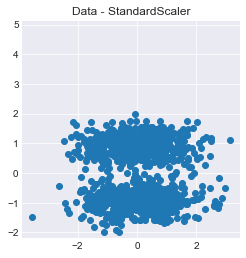

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
Scaled_data1 = scaler.transform(data)

plot_scatter(Scaled_data1[:, 0], Scaled_data1[:, 1], auto_scaled=False, title='Data - StandardScaler')

### (Bonus) K-means (2 points)

Illustrate the impact of scaling on basic distance-based clustering algorithm [K-means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) using `data` generated above.

**NOTE:** basically, you don't need understanding K-means algorithm here, you just need to:

1) run algorithm (with k=2, k - number of clusters/classes) on unscaled data    
2) run algorithm (with k=2) on scaled data    
3) plot results: highlight different clusters using different colors.

You can use this [question](https://stats.stackexchange.com/questions/89809/is-it-important-to-scale-data-before-clustering/89813) as a hint, but I recommend you to plot results using `plot_scatter` with `equal_scaled=True`: it might help you to intuitively understand the reasons of such scaling impact.


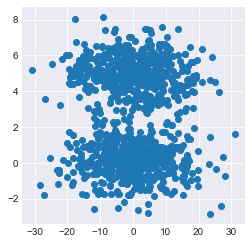

In [22]:
feature_0 = np.random.randn(1000) * 10   
feature_1 = np.concatenate([np.random.randn(500), np.random.randn(500) + 5])
data = np.column_stack([feature_0, feature_1])
plot_scatter(data[ : , 0], data[ :, 1], auto_scaled=True)
plt.show()

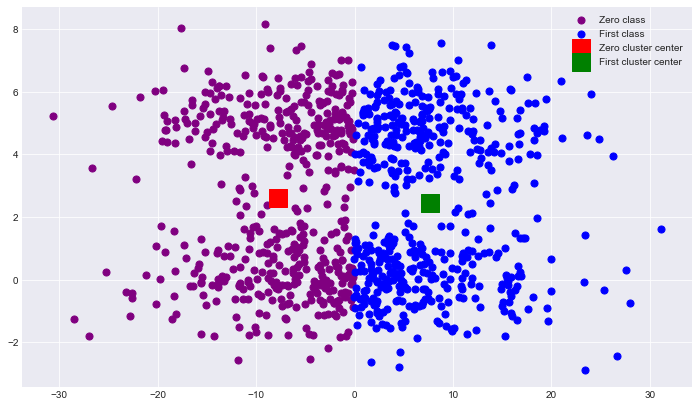

In [23]:
from sklearn.cluster import KMeans
%matplotlib inline
kmeans = KMeans(n_clusters=2, init='random').fit(data)
zero_cluster_center, first_cluster_center = kmeans.cluster_centers_
predictions = kmeans.predict(data)

zero_class = data[predictions==0]
one_class = data[predictions==1]

plt.figure(figsize=(12, 7))

plt.scatter(zero_class[ : , 0], zero_class[ : , 1], s = 50, c='purple', label='Zero class')
plt.scatter(one_class[ : , 0], one_class[ : , 1], s = 50, c='blue', label='First class')

plt.scatter(*zero_cluster_center, s = 300, c='red', marker='s', label='Zero cluster center')
plt.scatter(*first_cluster_center, s = 300, c='green', marker='s', label='First cluster center')
plt.legend()
plt.show()

Из графика видно, что с неотскалированными данными  K-means работает неправильно. 

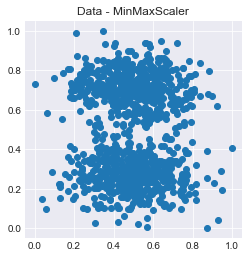

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data)
Scaled_data = scaler.transform(data)

plot_scatter(Scaled_data[:, 0], Scaled_data[:, 1], auto_scaled=False, title='Data - MinMaxScaler')

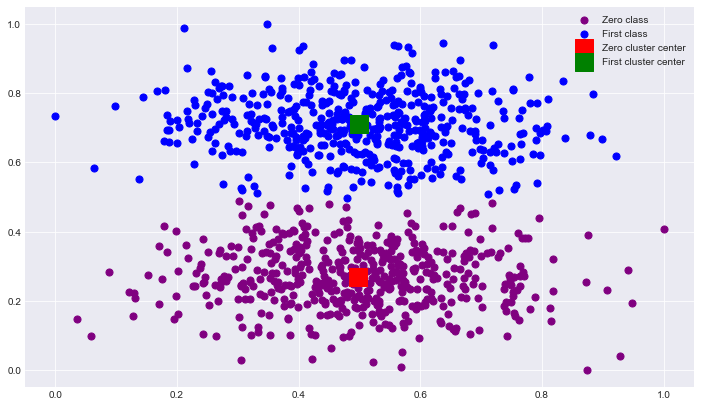

In [25]:
from sklearn.cluster import KMeans
%matplotlib inline
kmeans = KMeans(n_clusters=2, init='random').fit(Scaled_data)
zero_cluster_center, first_cluster_center = kmeans.cluster_centers_
predictions = kmeans.predict(Scaled_data)

zero_class = Scaled_data[predictions==0]
one_class = Scaled_data[predictions==1]

plt.figure(figsize=(12, 7))

plt.scatter(zero_class[ : , 0], zero_class[ : , 1], s = 50, c='purple', label='Zero class')
plt.scatter(one_class[ : , 0], one_class[ : , 1], s = 50, c='blue', label='First class')

plt.scatter(*zero_cluster_center, s = 300, c='red', marker='s', label='Zero cluster center')
plt.scatter(*first_cluster_center, s = 300, c='green', marker='s', label='First cluster center')
plt.legend()
plt.show()

Из графика видно, что с отскалированными при помощи MinMaxScaler данными  K-means работает правильно. 

Проверим StandardScaler:

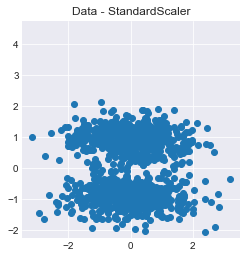

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
Scaled_data1 = scaler.transform(data)

plot_scatter(Scaled_data1[:, 0], Scaled_data1[:, 1], auto_scaled=False, title='Data - StandardScaler')

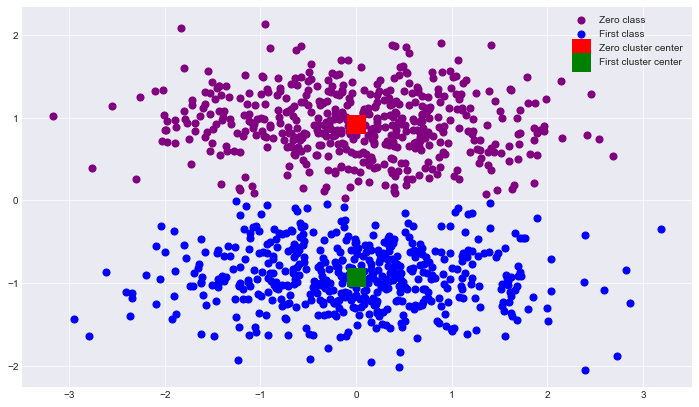

In [27]:
from sklearn.cluster import KMeans
%matplotlib inline
kmeans = KMeans(n_clusters=2, init='random').fit(Scaled_data1)
zero_cluster_center, first_cluster_center = kmeans.cluster_centers_
predictions = kmeans.predict(Scaled_data1)

zero_class = Scaled_data1[predictions==0]
one_class = Scaled_data1[predictions==1]

plt.figure(figsize=(12, 7))

plt.scatter(zero_class[ : , 0], zero_class[ : , 1], s = 50, c='purple', label='Zero class')
plt.scatter(one_class[ : , 0], one_class[ : , 1], s = 50, c='blue', label='First class')

plt.scatter(*zero_cluster_center, s = 300, c='red', marker='s', label='Zero cluster center')
plt.scatter(*first_cluster_center, s = 300, c='green', marker='s', label='First cluster center')
plt.legend()
plt.show()

Из графика видно, что с отскалированными при помощи StandardScaler данными  K-means работает также правильно.

## Exercise  3 - Preprocessing Pipeline (2 points)

In [28]:
wine_data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [29]:
wine_train, wine_val, wine_labels_train, wine_labels_val = train_test_split(wine_data, wine_labels, 
                                                                            test_size=0.3, random_state=42)

Train model (for example, `LogisticRegression(solver='liblinear', penalty='l1')` on raw `wine_train` data; then train same model after data scaling; then add feature selection (and train model again on scaled data). For each experiment all required preprocessing steps (if any) should be wrapped into sklearn pipeline.

Measure `accuracy` of all 3 approaches on `wine_val` dataset. Describe and explain results.

In [30]:
wine_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
138,13.49,3.59,2.19,19.5,88.0,1.62,0.48,0.58,0.88,5.70,0.81,1.82,580.0
104,12.51,1.73,1.98,20.5,85.0,2.20,1.92,0.32,1.48,2.94,1.04,3.57,672.0
78,12.33,0.99,1.95,14.8,136.0,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750.0
36,13.28,1.64,2.84,15.5,110.0,2.60,2.68,0.34,1.36,4.60,1.09,2.78,880.0
93,12.29,2.83,2.22,18.0,88.0,2.45,2.25,0.25,1.99,2.15,1.15,3.30,290.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,13.86,1.51,2.67,25.0,86.0,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410.0
106,12.25,1.73,2.12,19.0,80.0,1.65,2.03,0.37,1.63,3.40,1.00,3.17,510.0
14,14.38,1.87,2.38,12.0,102.0,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547.0
92,12.69,1.53,2.26,20.7,80.0,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495.0


## Original wine_data

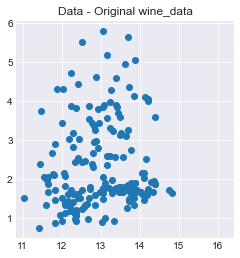

In [31]:
data = np.column_stack([wine_data, wine_labels])
plot_scatter(data[ : , 0], data[ :, 1], auto_scaled=False, title='Data - Original wine_data')
plt.show()

In [32]:
selection_model = RandomForestClassifier(random_state=42)
selector = SelectFromModel(selection_model).fit(wine_train, wine_labels_train)
wine_val_pruned = selector.transform(wine_train)
print(wine_train.columns[selector.get_support()])
print(f'Original shape: {wine_train.shape}')
print(f'Shape after selection: {wine_val_pruned.shape}')


Index(['alcohol', 'flavanoids', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')
Original shape: (124, 13)
Shape after selection: (124, 6)


- После селективного выбора наиболее важных признаков из 13-ти начальных при помощи RandomForestClassifier унас осталось 6 признаков

In [33]:
main_model = LogisticRegression(solver='liblinear', penalty='l1')

pipe_baseline = make_pipeline(StandardScaler(), main_model)
pipe_selection = make_pipeline(StandardScaler(), SelectFromModel(selection_model), main_model) # fix to select only once

print('Result - accuracy on original     nonscaled data: {:f}'.format(cross_val_score(pipe_baseline, wine_train, wine_labels_train, 
                      scoring='accuracy', cv=5).mean()))

print('Result - accuracy after selection nonscaled data: {:f}'.format(cross_val_score(pipe_selection, wine_train, wine_labels_train, 
                      scoring='accuracy', cv=5).mean()))

Result - accuracy on original     nonscaled data: 0.975667
Result - accuracy after selection nonscaled data: 0.959667


## Scaled wine_data

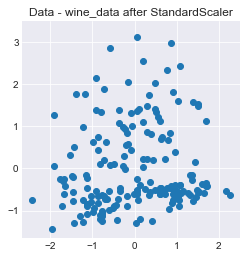

In [34]:
from sklearn.preprocessing import StandardScaler
wine_data_scaled = StandardScaler().fit_transform(wine_data)
plot_scatter(wine_data_scaled[:, 0], wine_data_scaled[:, 1], auto_scaled=False, title='Data - wine_data after StandardScaler')

In [35]:
wine_train_scaled, wine_val_scaled, wine_labels_train, wine_labels_val = train_test_split(wine_data_scaled, wine_labels, 
                                                                            test_size=0.3, random_state=42)

In [36]:
main_model = LogisticRegression(solver='liblinear', penalty='l1')

pipe_baseline = make_pipeline(StandardScaler(), main_model)
pipe_selection = make_pipeline(StandardScaler(), SelectFromModel(selection_model), main_model) # fix to select only once

print('Result - accuracy on original     scaled data: {:f}'.format(cross_val_score(pipe_baseline, wine_train_scaled, wine_labels_train, 
                      scoring='accuracy', cv=5).mean()))

print('Result - accuracy after selection scaled data: {:f}'.format(cross_val_score(pipe_selection, wine_train_scaled, wine_labels_train, 
                      scoring='accuracy', cv=5).mean()))

Result - accuracy on original     scaled data: 0.975667
Result - accuracy after selection scaled data: 0.959667


- Нам удалось значительно сократить количество признаков, но, мы не добились улучшения Score (accuracy).
- Попробуем рукурсивное устранение признаков: сначала модель обучается на начальном наборе признаков и определяется важность каждого признака. Затем наименее важные функции удаляются из текущего набора функций. Эта процедура рекурсивно повторяется на сокращенном наборе до тех пор, пока в конечном итоге не будет достигнуто желаемое количество признаков для выбора

In [37]:
min_features_to_select = 1 
rfecv = RFECV(estimator=main_model, step=1, cv=KFold(3), 
              scoring='accuracy', min_features_to_select=min_features_to_select)
rfecv.fit(wine_train_scaled, wine_labels_train)

print("Optimal number of features : %d" % rfecv.n_features_)
print('             Best features :', wine_train.columns[rfecv.get_support()])

Optimal number of features : 9
             Best features : Index(['alcohol', 'ash', 'alcalinity_of_ash', 'flavanoids', 'proanthocyanins',
       'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')


In [38]:
wine_train_9 = wine_train[wine_train.columns[rfecv.get_support()]]
wine_train_9

,alcohol,ash,alcalinity_of_ash,flavanoids,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
138,13.49,2.19,19.5,0.48,0.88,5.70,0.81,1.82,580.0
104,12.51,1.98,20.5,1.92,1.48,2.94,1.04,3.57,672.0
78,12.33,1.95,14.8,1.85,2.76,3.40,1.06,2.31,750.0
36,13.28,2.84,15.5,2.68,1.36,4.60,1.09,2.78,880.0
93,12.29,2.22,18.0,2.25,1.99,2.15,1.15,3.30,290.0
...,...,...,...,...,...,...,...,...,...
71,13.86,2.67,25.0,2.86,1.87,3.38,1.36,3.16,410.0
106,12.25,2.12,19.0,2.03,1.63,3.40,1.00,3.17,510.0
14,14.38,2.38,12.0,3.64,2.96,7.50,1.20,3.00,1547.0
92,12.69,2.26,20.7,1.46,1.62,3.05,0.96,2.06,495.0


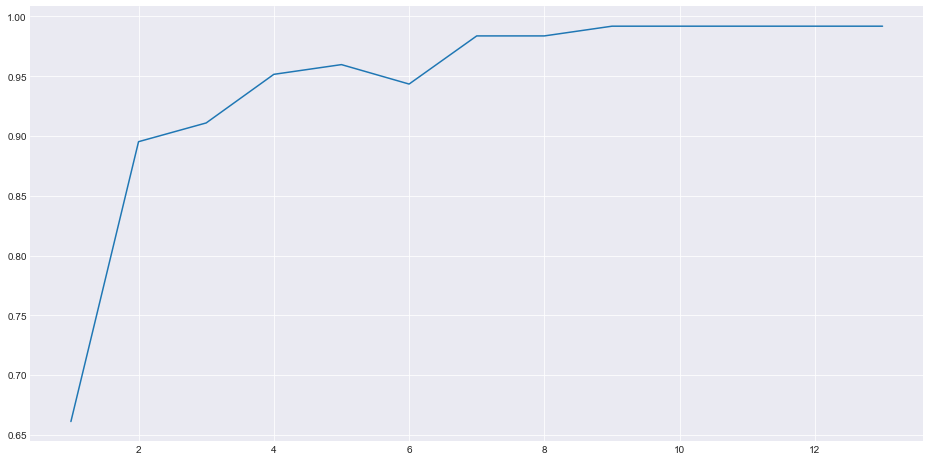

In [39]:
plt.figure(figsize=(16,8))
plt.plot(range(min_features_to_select,
               len(rfecv.grid_scores_) + min_features_to_select),
         rfecv.grid_scores_)
plt.show()

In [40]:
print('Result - accuracy on Optimal number of features = %d' % rfecv.n_features_,  ', on scaled data = {:f}'.format(cross_val_score(pipe_baseline, wine_train_9, wine_labels_train, 
                      scoring='accuracy', cv=5).mean()))

Result - accuracy on Optimal number of features = 9 , on scaled data = 0.975667


#### ВЫВОД: 
- получилось найти минимальное количество признаков, обеспечивающих максимальное значение Score (accuracy)

## Exercise 4 - manual PCA (5 points)
The task is to solve PCA as an optimization problem, without explicitly doing eigen value decomposition.
In the most general setting PCA is minimization of reconstruction error of a projection of given rank $q$

$$\min_{\mu, \lambda_1,\ldots, \lambda_n, \mathbf{V}_q} \sum_{i=1}^n ||x_i - \mu - \mathbf{V}_q \lambda_i||^2$$

With a number of steps that can be found here https://stats.stackexchange.com/a/10260 this task transforms to
 $$\max_{u_i} \sum_{i=1}^q u_i^T \mathbf{S} u_i$$
 where $\mathbf{S}$ is the sample covariance matrix (after standartization) and $u_1, \ldots, u_q$ are the $q$ are orthonormal columns in $\mathbf{V}_q$.
 Let us solve this optimization problem with `scipy.optimize` library.
 
 Additional 2 point are given for visualization of the results.

### PCA (3 points)

In [41]:
wine_data, wine_labels = wine_sklearn['data'], wine_sklearn['target']

Find a covariance matrix of standartized data and assing it to S.

- ковариационная матрица, представляет собой матрицу, в которой каждый элемент представляет ковариацию между двумя функциями. Ковариация между двумя признаками рассчитывается следующим образом:
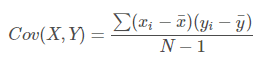

In [42]:
X = StandardScaler().fit_transform(wine_data) # let's standartized our data

X_mean = np.mean(X, axis=0)

# cov_mat = np.cov(X)
cov_mat = (X - X_mean).T.dot((X - X_mean)) / (X.shape[0]-1)
#print('Covariance matrix \n%s' %cov_mat)

S = cov_mat

If your code is correct, the following assert should be Ok.

In [43]:
assert np.allclose(np.linalg.norm(S), 5.787241159764733)

In [44]:
from scipy.optimize import minimize

def objective(x):
    # your code: write objective of the problem (don't forget that scipy does min while we need max)
    return -(x.T@S@x)

def norm_constraint(x):
    # your code: constaraint norm of x to be 1, function should return 0 if constraint holds
    return np.linalg.norm(x) - 1    

con1 = {'type': 'eq', 'fun': norm_constraint}

x0 = np.ones(13) #your code

sol = minimize(objective, 
               x0, 
               constraints = [con1]
              )
x0 = sol.x

In [45]:
x0

array([ 0.14414951, -0.24532606, -0.00189216, -0.23920521,  0.14176874,
        0.39442771,  0.42331205, -0.29804898,  0.31386648, -0.08880802,
        0.29618488,  0.37639876,  0.28690592])

Hurray! We have first vector! Let's do another one.

In [46]:
def orthogonality_constraint(x):
    # your code: x should be orthogonal to x0, function should return 0 if constraint holds
    return x.T@x0

con2 = {'type': 'eq', 'fun': orthogonality_constraint}

x1 = np.zeros(13) #your code


sol = minimize(objective, 
               x1, 
               constraints = ({'type': 'eq', 'fun': norm_constraint},
                              {'type': 'eq', 'fun': orthogonality_constraint})    #your code
              )

x1 = sol.x

In [47]:
x1

array([ 0.48366161,  0.22491769,  0.31608539, -0.01059348,  0.29963389,
        0.06506941, -0.00333457,  0.02876469,  0.03931446,  0.52997989,
       -0.27921967, -0.16447295,  0.36492326])

In [48]:
print(x0@S@x0)
print(x1@S@x1)

4.732432539837777
2.5110809503075964


If your solution is correct, the following asserts should be Ok.

In [49]:
assert np.allclose(x0@S@x0, 4.732436977583595)
assert np.allclose(x1@S@x1, 2.5110809296451233)

### Visualization (2 points)

Visualize the points after applying custom dimension reduction with 2 components.

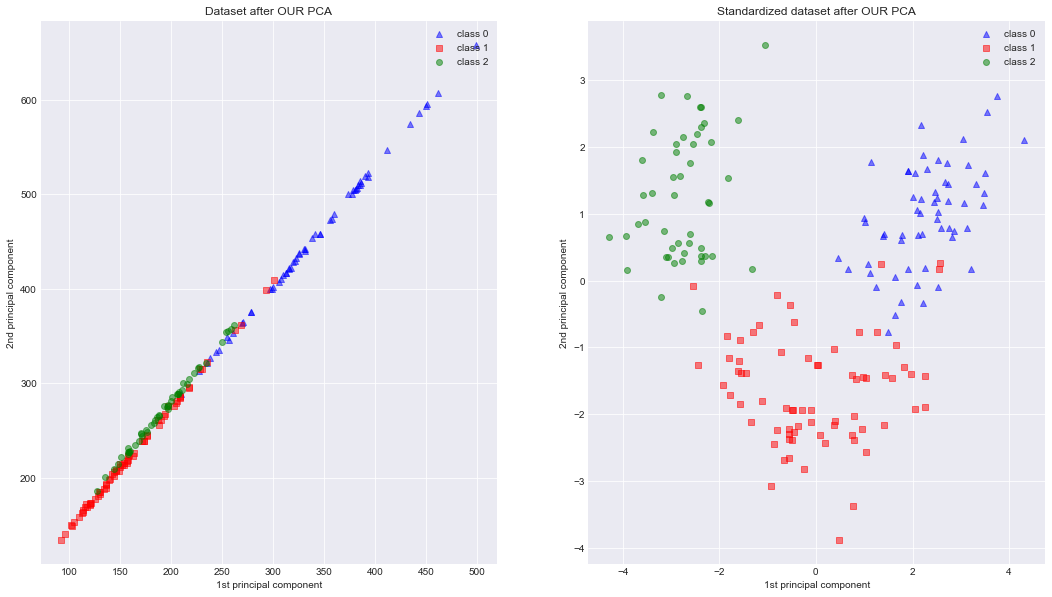

In [50]:
pca = PCA(n_components=2)

# Original Data 
wine_data_our_pca_0 = wine_data@x0
wine_data_our_pca_1 = wine_data@x1
wine_data_our_pca = np.column_stack((wine_data_our_pca_0, wine_data_our_pca_1))

# Data after StandartScaler
wine_data_scaled_our_pca_0 = X@x0  
wine_data_scaled_our_pca_1 = X@x1
wine_data_scaled_our_pca = np.column_stack((wine_data_scaled_our_pca_0, wine_data_scaled_our_pca_1))


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 10))

for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax1.scatter(wine_data_our_pca[wine_labels == l, 0], wine_data_our_pca[wine_labels == l, 1], 
                color=c, label=f'class {l}', alpha=0.5, marker=m)

for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax2.scatter(wine_data_scaled_our_pca[wine_labels == l, 0], wine_data_scaled_our_pca[wine_labels == l, 1], 
                color=c, label=f'class {l}', alpha=0.5, marker=m)
    
ax1.set_title('Dataset after OUR PCA')
ax2.set_title('Standardized dataset after OUR PCA')

for ax in (ax1, ax2):
    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')

ВЫВОД:
- использование custom dimension reduction with 2 components x0 and x1 на нескалированных данных дало "вид сбоку"
- использование custom dimension reduction with 2 components x0 and x1 на скалированных данных дало фронтальный легко классифицируемый вид данных

## Exercise 5 - Boruta (3 points)

Let us classify handwritten digits 0, 1 and 2. 
To make task not so easy the images are binarized (no shadows of gray present) as it happens with xerocopied documents.

Let us also find out to which parts of an image there's no need to look in order to clasify three digits of interest.

In [51]:
X, y = load_digits(n_class=3, return_X_y=True, as_frame=True)
X = (X>10).astype(int)

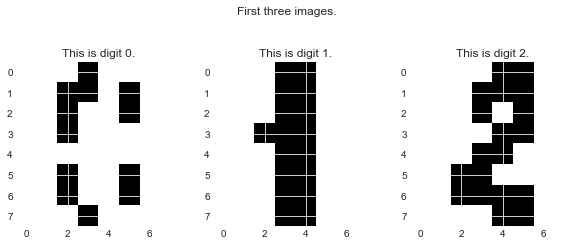

In [52]:
f, ax = plt.subplots(1,3,figsize=(10,4))
for i in range(3):
    ax[i].imshow(X.iloc[i].values.reshape(8,8))
    ax[i].set_title(f"This is digit {y[i]}.")
plt.suptitle("First three images.")
plt.show()

Split data into train and test, let test size be 30% of the dataset and fix random state to 42:

In [53]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
assert y_val.shape[0] == 162
assert y_val.sum() == 169

Fit a RandomForestClassifier with max_depth=13 and evaluate it's performance:

In [55]:
clf = RandomForestClassifier(max_depth=13)

clf.fit(X_train,y_train)
y_pred=clf.predict(X_val)

from sklearn import metrics
acc = metrics.accuracy_score(y_val, y_pred)

print(acc)

0.9938271604938271


In [56]:
assert acc > 0.98

Now we will use Boruta to find redundand pixels. If the package is not installed in your system, uncomment and run the following cell.

In [57]:
# ! pip install boruta

In [58]:
from boruta import BorutaPy

feat_selector = BorutaPy(RandomForestClassifier(max_depth=13), 
                         n_estimators='auto', 
                         verbose=0, 
                         max_iter=100,
                         random_state=42)

feat_selector.fit(X_train.to_numpy(), y_train)
X_train_pruned = feat_selector.transform(X_train.to_numpy())

Let us print redundant pixels as a mask. Does the result looks similar to mine (or to Among us chracters)? 

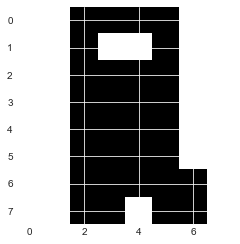

In [59]:
mask = np.array(feat_selector.support_).reshape(8,8)
plt.imshow(mask);

At the end let us redo  classification but only with selected features

In [61]:
clf = RandomForestClassifier(max_depth=13)

clf.fit(X_train,y_train)
y_pred=clf.predict(X_val)

acc = metrics.accuracy_score(y_val, y_pred)

print(acc)

0.9938271604938271


In [62]:
min_features_to_select = 1 
rfecv = RFECV(estimator=main_model, step=1, cv=KFold(3), 
              scoring='accuracy', min_features_to_select=min_features_to_select)
rfecv.fit(wine_train_scaled, wine_labels_train)

print("Optimal number of features : %d" % rfecv.n_features_)
print('             Best features :', wine_train.columns[rfecv.get_support()])

Optimal number of features : 9
             Best features : Index(['alcohol', 'ash', 'alcalinity_of_ash', 'flavanoids', 'proanthocyanins',
       'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')


In [63]:
assert acc > 0.99

# Materials & References

1. General article about feature engineering and selection (main reference):
https://github.com/Yorko/mlcourse.ai/blob/master/jupyter_english/topic06_features_regression/topic6_feature_engineering_feature_selection.ipynb

2. Feature engineering/preprocessing, using scikit-learn API (great code examples, but really brief explanation):    
https://scikit-learn.org/stable/modules/preprocessing

3. Feature scaling/normalization:     
https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35

4. Log Transform/power transform:    
https://medium.com/@kyawsawhtoon/log-transformation-purpose-and-interpretation-9444b4b049c9

6. Missing values preprocessing using scikit-learn API (great code examples, great explanation):    
https://scikit-learn.org/stable/modules/impute.html

7. Feature selection scikit-learn API (great code examples, great explanation):   
https://scikit-learn.org/stable/modules/feature_selection.html

8. Melbourne housing dataset source:    
https://www.kaggle.com/anthonypino/melbourne-housing-market